Two of the most important datastructures in Pandas are the ```Series``` and ```DataFrame```.
# Series
A pandas ```Series``` is just an array with an associated index. Basically just an associative array, or in python terms, a fixed length ordered dictionary.

In [24]:
from pandas import Series
Series([1,2,3,4,5])
# Note the index on the left hand side when printed

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [25]:
a = Series([1, 2, 3, 4, 5])
a.values, a.index # Notice how the values of a series is just an array and the Index is a special type

(array([1, 2, 3, 4, 5]), RangeIndex(start=0, stop=5, step=1))

In [26]:
# By default a Series doesn't have a name, but you can assign it one:
Series([1,2,3,4], name="My Series")

0    1
1    2
2    3
3    4
Name: My Series, dtype: int64

In [27]:
# You can change the index if you want
indexed_series = Series([1,2,3,4,5], index=['a','b','c','d','e'])
indexed_series

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [28]:
# You use the assigned index or a numeric index to access elements
indexed_series['c'], indexed_series[0]
# In other words, a Series is really just an ordered dict

(3, 1)

In [29]:
# In fact, you can create a series right from a python dict
myseries = Series({'Netherlands': 5, 'Belgium': 10, 'France': 21})
myseries

Netherlands     5
Belgium        10
France         21
dtype: int64

In [30]:
# You can access it by number of by index, note that Belgium comes first as the dictionary is sorted by key
myseries[0], myseries['Netherlands']

(5, 5)

Like with regular numpy arrays, you can create boolean masks on ```Series``` and use them to filter out certain values in the ```Series```, like so:

In [31]:
myseries[myseries % 2 == 1] # filter out odd values

Netherlands     5
France         21
dtype: int64

In [32]:
# Sorting by value:
myseries.sort_values()

Netherlands     5
Belgium        10
France         21
dtype: int64

A useful feature about ```Series``` is that the operations that can act on it are often smart enough to combine values by index. For example, when adding to ```Series``` together, the values of the same indices (=keys) will automatically be summed together, like so:

In [33]:
a_dict = {'Netherlands': 5, 'Belgium': 10, 'France': 21, 'UK': 5}
b_dict = {'Netherlands': 2, 'Belgium': 1, 'France': -9, 'USA': 4}
a = Series(a_dict)
b = Series(b_dict)
a+b

Belgium        11.0
France         12.0
Netherlands     7.0
UK              NaN
USA             NaN
dtype: float64

This is not supported in python by default:

In [34]:
a_dict + b_dict # Doesn't work, TypeError

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

# DataFrame

Where a ```Series``` is like a single associative array, a ```DataFrame``` is a rectangular table of data which contains an ordered collection of columns (i.e. ```Series```).

In [35]:
# python list of dictionaries that all have the same keys
customers = [
    {'name': "John", 'last_name': "Smith", 'age': 43, 'customer_nr': 12345 },
    {'name': "Mary", 'last_name': "Potter", 'age': 25, 'customer_nr': 67889 },
    {'name': "Rose", 'last_name': "Harrison", 'age': 39, 'customer_nr': 23456 },
    {'name': "John", 'last_name': "Ford", 'age': 56, 'customer_nr': 99999 },  
    {'name': "Patrick", 'last_name': "Harrison", 'age': 41, 'customer_nr': 7777 },
]
# print customers

In [36]:
# let's create a dataframe from this
import pandas as pd
customers_df = pd.DataFrame(customers)
print(customers_df) # As you'll notice, pandas does pretty printing!

      name last_name  age  customer_nr
0     John     Smith   43        12345
1     Mary    Potter   25        67889
2     Rose  Harrison   39        23456
3     John      Ford   56        99999
4  Patrick  Harrison   41         7777


In [37]:
import numpy as np
# customers_df.select(lambda x: x.name == "John")
customers_df[customers_df['name'] == "John"]

,name,last_name,age,customer_nr
0,John,Smith,43,12345
3,John,Ford,56,99999


In [38]:
# Alternative way to define a the same thing
customers = {
    'name': ["John", "Mary", "Rose", "John", "Patrick"],
    'last_name': ["Smith", "Potter", "Harrison", "Ford", "Harrison"],
    'age': [43,25,39,56,41],
    'customer_nr': [12345, 67889, 23456,99999,7777]
}
customers_df = pd.DataFrame(customers)
print(customers_df)

      name last_name  age  customer_nr
0     John     Smith   43        12345
1     Mary    Potter   25        67889
2     Rose  Harrison   39        23456
3     John      Ford   56        99999
4  Patrick  Harrison   41         7777


In [39]:
# By default, rows are labeled by numbers, but you can also give them labels, like so
population = {'Nevada': {2001: 2.4, 2002: 2.9},
                 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
pd.DataFrame(population)

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


## Dataframe manipulation

Pandas then has a bunch of methods on the DataFrame that allows you to easily manipulate the data.

In [40]:
# accessing a certain column (this is a Series that get's returned), either by key or attribute name
print(customers_df['name'], "\n\n", customers_df.name)

0       John
1       Mary
2       Rose
3       John
4    Patrick
Name: name, dtype: object 

 0       John
1       Mary
2       Rose
3       John
4    Patrick
Name: name, dtype: object


In [41]:
# To access a certain row, use df.loc:
customers_df.loc[2] # Note that rows are also Series (you can tell from the output because it has a Name and dtype)

name               Rose
last_name      Harrison
age                  39
customer_nr       23456
Name: 2, dtype: object

In [42]:
# Transpose:
customers_df.T

,0,1,2,3,4
name,John,Mary,Rose,John,Patrick
last_name,Smith,Potter,Harrison,Ford,Harrison
age,43,25,39,56,41
customer_nr,12345,67889,23456,99999,7777


In [43]:
# Sort by a certain column:
customers_df.sort_values(by='age') # You can also sort by multiple columns by passing an array

,name,last_name,age,customer_nr
1,Mary,Potter,25,67889
2,Rose,Harrison,39,23456
4,Patrick,Harrison,41,7777
0,John,Smith,43,12345
3,John,Ford,56,99999


In [44]:
# count occurences
customers_df['name'].value_counts() # there are 2 johns!

John       2
Mary       1
Rose       1
Patrick    1
Name: name, dtype: int64

In [45]:
# sum() sums that columns that have a dtype that can be summed. 
# describe() provides statistical data for the columns with a dtype for which it can be done
# There's a lot of more of these convenience functions like mean, median, prod, std, var, min/max, etc.
print(customers_df.sum(), "\n\n", customers_df.describe())

name                   JohnMaryRoseJohnPatrick
last_name      SmithPotterHarrisonFordHarrison
age                                        204
customer_nr                             211466
dtype: object 

              age   customer_nr
count   5.000000      5.000000
mean   40.800000  42293.200000
std    11.054411  40088.050529
min    25.000000   7777.000000
25%    39.000000  12345.000000
50%    41.000000  23456.000000
75%    43.000000  67889.000000
max    56.000000  99999.000000


In [46]:
# Add a new column and assign a value for existing column
import datetime
customers_df['signup_date'] = datetime.datetime.now()
customers_df ['customer_nr'] = 1234 # Set all values to 1234, you can also pass an array to specify each value
customers_df

,name,last_name,age,customer_nr,signup_date
0,John,Smith,43,1234,2023-02-18 11:33:38.542571
1,Mary,Potter,25,1234,2023-02-18 11:33:38.542571
2,Rose,Harrison,39,1234,2023-02-18 11:33:38.542571
3,John,Ford,56,1234,2023-02-18 11:33:38.542571
4,Patrick,Harrison,41,1234,2023-02-18 11:33:38.542571


In [47]:
# Boolean masks: select all customers that are older than 40
# Note the use of 3
customers_df[customers_df['age'] > 40]

,name,last_name,age,customer_nr,signup_date
0,John,Smith,43,1234,2023-02-18 11:33:38.542571
3,John,Ford,56,1234,2023-02-18 11:33:38.542571
4,Patrick,Harrison,41,1234,2023-02-18 11:33:38.542571


<AxesSubplot:>

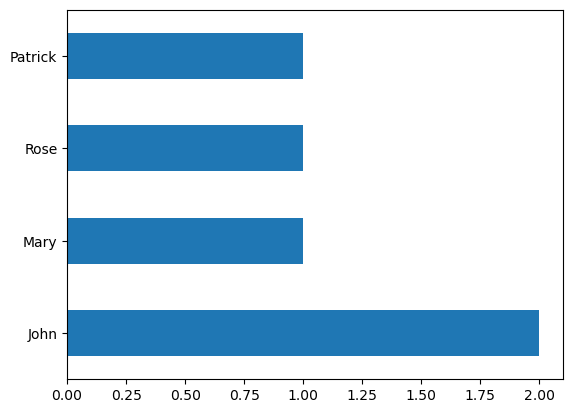

In [48]:
# you can plot counts (do matplotlib plots inline)
%matplotlib inline 
name_counts = customers_df['name'].value_counts()
name_counts.plot(kind='barh') # barh = bar horizontal

## Dataframes and functions

In [49]:
# Let's define a dataframe
numbers = pd.DataFrame({
    'elevation': [123, -23, 456],
    'signal_strength': [-783, 123, 453]
})
numbers

,elevation,signal_strength
0,123,-783
1,-23,123
2,456,453


In [50]:
# Since a dataframe is just a Series of Series, you can apply numpy functions to it, like so:
import numpy as np
np.abs(numbers)

,elevation,signal_strength
0,123,783
1,23,123
2,456,453


In [51]:
# Apply a custom function to a column (=series at a time)
numbers.apply(lambda col_series: col_series + 100)

,elevation,signal_strength
0,223,-683
1,77,223
2,556,553


In [52]:
# Apply a custom function to an element at a time
numbers.applymap(lambda val: 0 if val < 100 else val)

,elevation,signal_strength
0,123,0
1,0,123
2,456,453
